In [6]:
# Import necessary libraries
import numpy as np
np.random.seed(1106)
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Exercise 1
This notebook will focus on data preprocessing. This is not only because preprocessing is extremely important in (Q)ML, but also to convey that the structure of the data in the feature space needs to be considered very carefully, which should transfer to the careful choice of embedding in QML.

In [7]:
#@title Predefined functions
# Plot the decision boundary
def plot_decision_boundary(X_train, X_test, y_train, y_test, model):
    display = DecisionBoundaryDisplay.from_estimator(model, np.concatenate((X_train,X_test)),  response_method="predict", alpha=0.4)
    display.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', cmap='viridis')
    display.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='^', edgecolor='k', cmap='viridis')
    train_handle = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Train')
    test_handle = plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='k', markersize=10, label='Test')
    plt.legend(handles=[train_handle, test_handle], title='Dataset', bbox_to_anchor=(1, 1))
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

Let's start by creating a simple data set, applying a kNN and looking at the predictions.

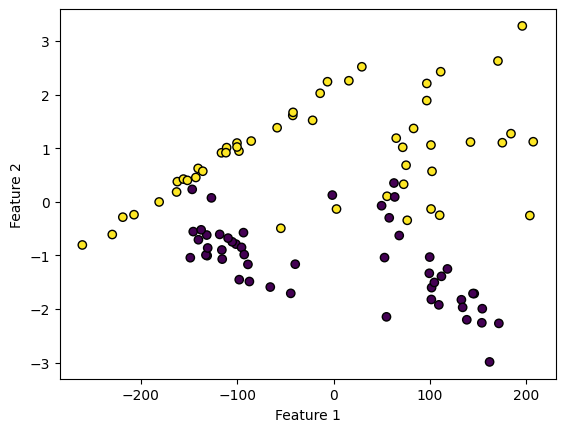

In [8]:
# Generate an artificial dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=2, random_state=1106)
X[:, 0] = X[:, 0]*100

# Plot the dataset
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1106)

# Initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data, this is just to store the training data in the knn instance, but there is no actual process.
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print('The test accuracy of your model is ', accuracy)

The test accuracy of your model is  0.6


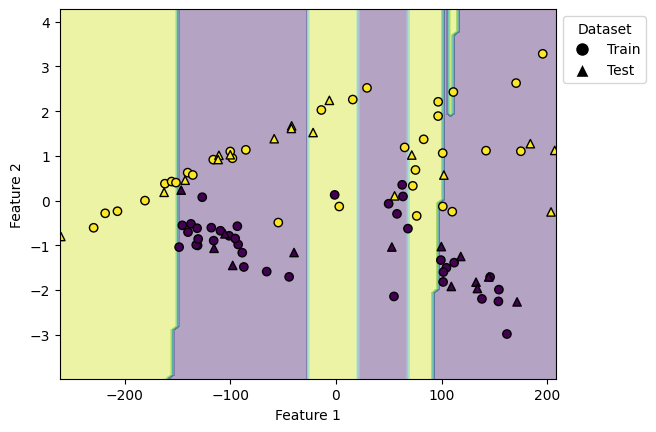

In [10]:
# Plot the decision boundary
plot_decision_boundary(X_train, X_test, y_train, y_test, knn)

As you can see, you model is performing poorly, what could you do to improve it without changing the code above? \\
Below you see the output after resoling the issue, try to get the same or even better separation before looking at the solution

The test accuracy of your model is  0.9333333333333333


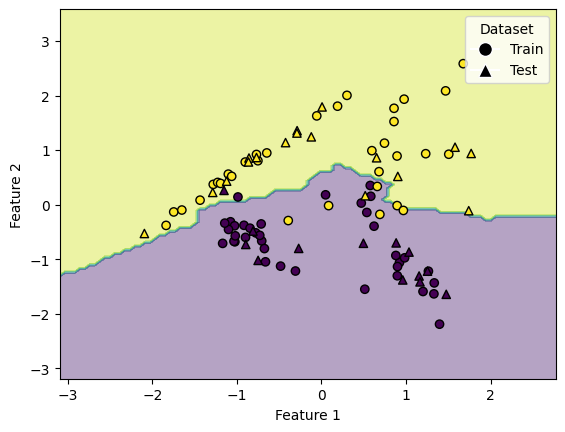

In [11]:
#@title Solution
# The data is not properly preprocessed, so the identification of a neighbor is completely dominated by the first feature.
# Solution: Standardize the data
# You probably noticed the X[:, 0] = X[:, 0]*100 above which causes this, you can revert it by X[:, 0] = X[:, 0]/np.std(X[:, 0]) (and for feature 1 accordingly).
# Below you see the same achieved with the StandardScaler that also centers you data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Repeat the above to show the new decision boundaries
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1106)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('The test accuracy of your model is ', accuracy)
plot_decision_boundary(X_train, X_test, y_train, y_test, knn)

So far we simply chose k=6. Let's optimize it already in this Exercise to have the code for Excercise 2

The optimal number of neighbors is 3


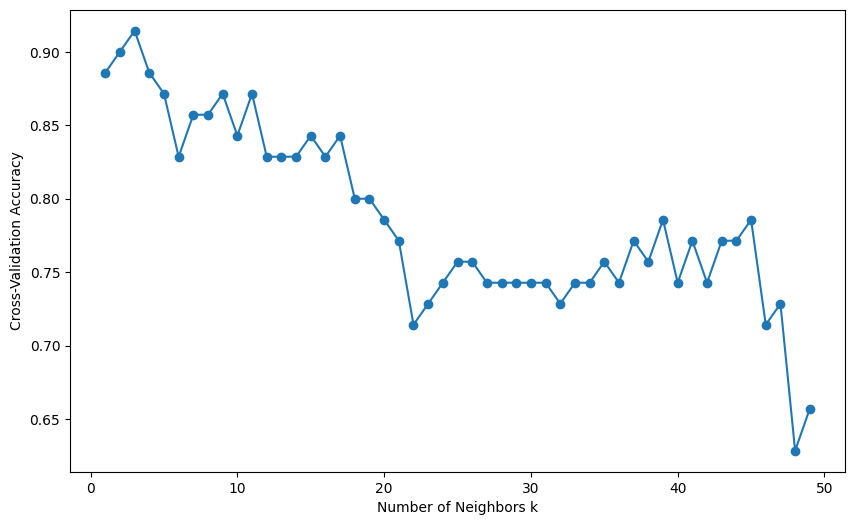

In [12]:
#Let's further improve the model by finding the optimal k using 5-fold cross validation
k_values = list(range(1, 50))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f'The optimal number of neighbors is {optimal_k}')

# Plot the accuracy for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors k")
plt.ylabel("Cross-Validation Accuracy")
plt.show()

# Exercise 2
Someone gives you an extremely realistic training and test dataset that looks like a checkerboard. You apply a kNN model it works perfectly.

In [13]:
#@title Predefined functions
def make_checkerboard():
    X = []
    y = []
    for i in range(10):
        for j in range(10):
            X.append([i,j])
            y.append((i+j)%2)

    indices_to_test = np.random.choice(len(X), 50, replace=False)
    X_test = []
    y_test = []
    for i in indices_to_test:
      X_test.append(X[i])
      y_test.append(y[i])

    return np.array(X), np.array(X_test), np.array(y), np.array(y_test)

def mess_around(X, y):
    indices_to_duplicate = np.random.choice(len(X), 50, replace=True)
    X_messed = []
    y_messed = []
    for i in indices_to_duplicate:
      X_messed.append(X[i])
      y_messed.append(y[i])
    return np.concatenate((X,X_messed)), np.concatenate((y,y_messed))

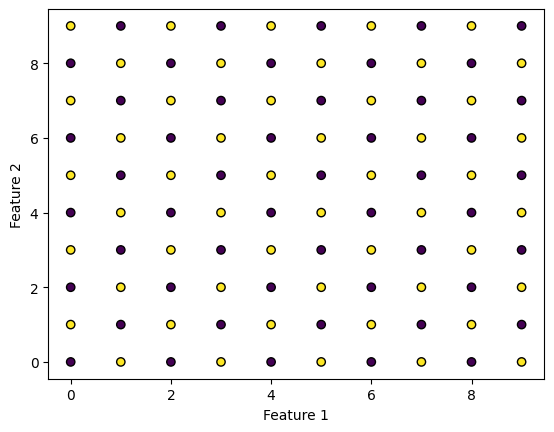

In [14]:
# Generate an artificial dataset
X_train, X_test, y_train, y_test = make_checkerboard()

# Plot the dataset
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

The test accuracy of your model is  1.0


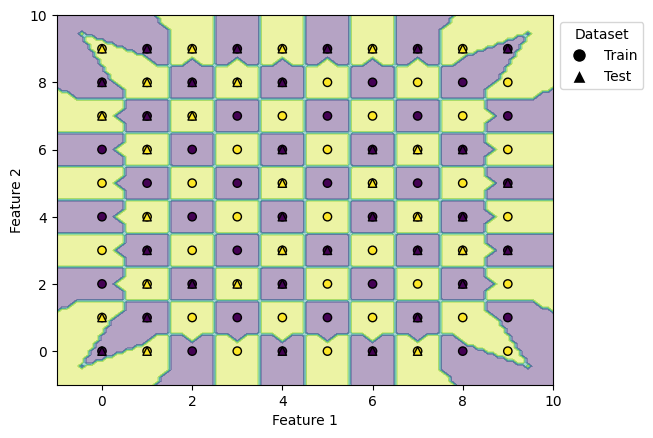

In [15]:
# Initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=9)

# Fit the classifier on the training data, this is merely to save the training thate in the knn instance as there is no training process in knn
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print('The test accuracy of your model is ', accuracy)
# Plot the decision boundary
plot_decision_boundary(X_train, X_test, y_train, y_test, knn)

You go out for coffee, and when you return, you find that someone has been messing with your data, and your test accuracy is now catastrophic.

The test accuracy of your model is  0.24


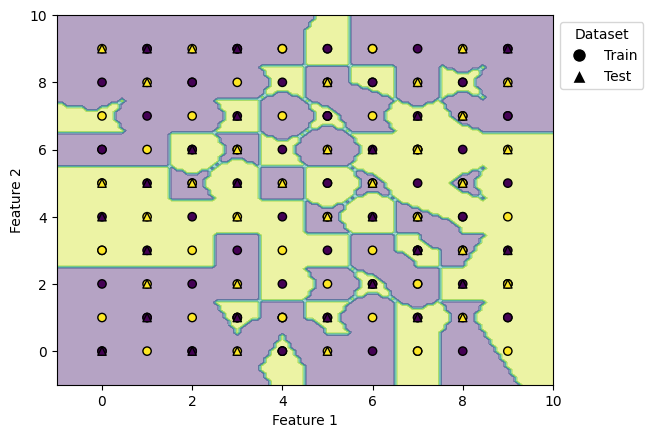

In [16]:
X_train, X_test, y_train, y_test = make_checkerboard()
X_train, y_train = mess_around(X_train, y_train)

#As before
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('The test accuracy of your model is ', accuracy)
plot_decision_boundary(X_train, X_test, y_train, y_test, knn)

Try to fix it again by optimizing k. What is the optimal k according to cross validation?

In [ ]:
#@title Solution
# The optimal k in 5-fold cv is 11, increasing the folds moves it towards 15
k_values = list(range(1, 50))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f'The optimal number of neighbors is {optimal_k}')

# Plot the accuracy for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors k")
plt.ylabel("Cross-Validation Accuracy")
plt.show()

Apparently perfect accuracy is not restored even with optimized k. You now have multiple ideas on how to fix it, like:
- look at the mess_around, understand what it did and revert it
- use your analytic instincts and outsmart cross-validation
- remember that you once heard that feature transformations can make separation easier
-...

Pick your preference and restore perfect accuracy

In [ ]:
#@title Solution using strategy 1
# Looking at the mess_around you notice that some training data has been duplicated. You can teherefore restore perfect accuracy by dropping duplicates.
# pandas is a great library when working with data, becuase it hase useful methods like .drop_duplicates(), which can be used

X_train, X_test, y_train, y_test = make_checkerboard()
X_train, y_train = mess_around(X_train, y_train)

import pandas as pd
X_train, X_test, y_train, y_test = make_checkerboard()
X_train, y_train = mess_around(X_train, y_train)
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_train.drop_duplicates(inplace=True)
y_train = y_train.loc[X_train.index]

#As before
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('The test accuracy of your model is ', accuracy)
plot_decision_boundary(X_train.to_numpy(), X_test, y_train.to_numpy(), y_test, knn)

In [ ]:
#@title Solution using strategy 2
# The original structure seems to be still instact. Even though you know that 1-nn is likely to overfit, you have a good feeling that it can work this time and it does.
# Wit cross-validation a part a the training data was used for testing the predictions, but for this to work well one would need a point at each square, so it identified 11 and not 1 as the best k

X_train, X_test, y_train, y_test = make_checkerboard()
X_train, y_train = mess_around(X_train, y_train)

#As before
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('The test accuracy of your model is ', accuracy)
plot_decision_boundary(X_train, X_test, y_train, y_test, knn)

In [ ]:
#@title Solution using strategy 3
# The symmetries of this dataset are very simple and there are many ways to exploit them.
# One option is to apply the following feature transformation

def transform_checkerboard(X):
  transformed_X = []
  for instance in X:
    transformed_X.append([np.cos(np.pi*instance[0]), np.cos(np.pi*instance[1])]) # of course this is just mod2 in that case, but for transformations mod is not common
  return np.array(transformed_X)

X_train, X_test, y_train, y_test = make_checkerboard()
X_train, y_train = mess_around(X_train, y_train)
X_train = transform_checkerboard(X_train)
X_test = transform_checkerboard(X_test)

#As before
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('The test accuracy of your model is ', accuracy)
plot_decision_boundary(X_train, X_test, y_train, y_test, knn)

# Exercise 3
Lastly we want to explore missing values, so we again start by making an arbitrary dataset and randomly setting features to nan (not a number)

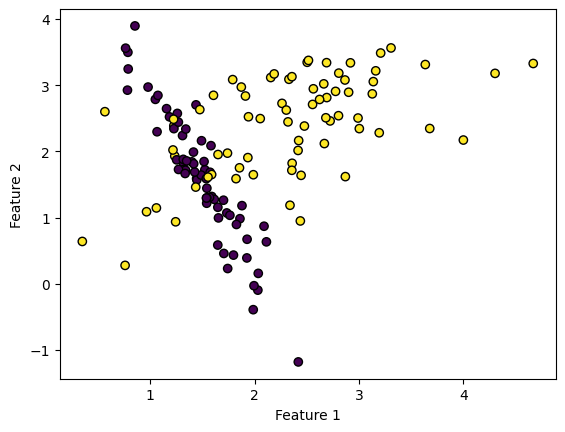

In [21]:
# Generate dataset
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_clusters_per_class=1, n_classes=2, class_sep=0.5, random_state=6)
X = X+2
missing_mask = np.random.choice([1, 0], size=X.shape, p=[0.2, 0.8]).astype(bool)
X[missing_mask] = np.nan

# Plot the dataset
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

First you try to set missing values simply to 0

The test accuracy of your model is  0.7833333333333333


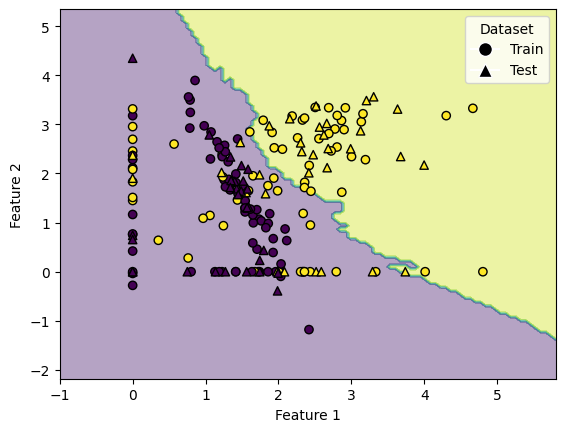

In [22]:
X_0 = np.nan_to_num(X, nan=0.0)
X_train, X_test, y_train, y_test = train_test_split(X_0, y, test_size=0.3, random_state=1106)

#As before
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('The test accuracy of your model is ', accuracy)
plot_decision_boundary(X_train, X_test, y_train, y_test, knn)

This does not seem ideal, what could be the problem?
Once you understand the problem and can formulate it, try to solve it in a modern way and ask your favorite LLM for help. (Of course you can also try to fix it yourself)

##Answer from GPT4 and Solution:


To replace NaN values in an `np.array` with the mean of each feature, you can use the following code. This approach ensures that the mean is calculated for each feature (column) and the NaN values are replaced accordingly.

```python
import numpy as np

# Sample np.array with NaN values
data = np.array([[1.0, 2.0, np.nan], [4.0, np.nan, 6.0], [7.0, 8.0, 9.0]])

# Function to replace NaN values with the mean of each column
def replace_nan_with_mean(data):
    # Calculate the mean of each column, ignoring NaNs
    col_means = np.nanmean(data, axis=0)
    
    # Find indices where NaN values are present
    inds = np.where(np.isnan(data))
    
    # Replace NaNs with the corresponding column mean
    data[inds] = np.take(col_means, inds[1])
    
    return data

# Replace NaN values
data = replace_nan_with_mean(data)

print(data)
```

Explanation
1. **Calculate Column Means:** The `np.nanmean(data, axis=0)` function calculates the mean of each column, ignoring NaN values.
2. **Identify NaN Indices:** `np.where(np.isnan(data))` finds the indices of NaN values in the array.
3. **Replace NaNs:** `np.take(col_means, inds[1])` selects the mean values for the respective columns and replaces the NaN values.

This code ensures that each NaN value in the array is replaced by the mean of its respective column.

In [ ]:
#@title Solution
# So the issue is that replacing nan values of Feature 1 with 0 shifts these instances into the space where there are mainly instances of the puple class. Therefore the accuracy is improved by replacing with the mean instead
# Below the solution from GPT4 is use, another elegant solution would also be to transform X to a pandas DataFrame and use the .fillna() method

def replace_nan_with_mean(data):
    # Calculate the mean of each column, ignoring NaNs
    col_means = np.nanmean(data, axis=0)

    # Find indices where NaN values are present
    inds = np.where(np.isnan(data))

    # Replace NaNs with the corresponding column mean
    data[inds] = np.take(col_means, inds[1])

    return data

X_mean = replace_nan_with_mean(X)
X_train, X_test, y_train, y_test = train_test_split(X_mean, y, test_size=0.3, random_state=1106)

#As before
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('The test accuracy of your model is ', accuracy)
plot_decision_boundary(X_train, X_test, y_train, y_test, knn)